# 200类鸟类细粒度分类识别

In [0]:
import os

train_set_dir = "train_set/"
val_set_dir = "val_set/"
test_set_dir = "test_set/"

print(len(os.listdir(train_set_dir)))
print(len(os.listdir(test_set_dir)))
print(len(os.listdir(test_set_dir)))

8251
1768
1768


**1. 探索数据**

In [0]:
import os

bird_dir = "/content/"
x_train_path = os.path.join(bird_dir,"train_set")
x_test_path = os.path.join(bird_dir,"test_set")
x_valid_path = os.path.join(bird_dir,"val_set")

y_train_path = os.path.join(bird_dir,"train_pname_to_index.csv")
y_valid_path = os.path.join(bird_dir,"val_pname_to_index.csv")

In [0]:
import pandas as pd

y_train = pd.read_csv(y_train_path,skiprows=0)
y_valid = pd.read_csv(y_valid_path,skiprows=0)

In [0]:
y_train.head()

,img_path,label
0,163.Cape_May_Warbler_1.jpg,163
1,141.Artic_Tern_2.jpg,141
2,183.Northern_Waterthrush_3.jpg,183
3,068.Ruby_throated_Hummingbird_4.jpg,68
4,128.Seaside_Sparrow_5.jpg,128


In [0]:
y_valid.head()

,img_path,label
0,003.Sooty_Albatross_1.jpg,3
1,074.Florida_Jay_2.jpg,74
2,108.White_necked_Raven_3.jpg,108
3,024.Red_faced_Cormorant_4.jpg,24
4,003.Sooty_Albatross_5.jpg,3


In [0]:
x_train_img_path = y_train["img_path"]
y_train = y_train["label"] - 1
x_valid_img_path = y_valid["img_path"]
y_valid = y_valid["label"] -1

print(x_train_img_path[:5])
print(y_train[:5])

print(x_valid_img_path[:5])
print(y_valid[:5])

0             163.Cape_May_Warbler_1.jpg
1                   141.Artic_Tern_2.jpg
2         183.Northern_Waterthrush_3.jpg
3    068.Ruby_throated_Hummingbird_4.jpg
4              128.Seaside_Sparrow_5.jpg
Name: img_path, dtype: object
0    162
1    140
2    182
3     67
4    127
Name: label, dtype: int64
0        003.Sooty_Albatross_1.jpg
1            074.Florida_Jay_2.jpg
2     108.White_necked_Raven_3.jpg
3    024.Red_faced_Cormorant_4.jpg
4        003.Sooty_Albatross_5.jpg
Name: img_path, dtype: object
0      2
1     73
2    107
3     23
4      2
Name: label, dtype: int64


**2.加载数据**

In [0]:
# 定义读取图片函数
import cv2
import numpy as np

def get_img(file_path,img_rows,img_cols):
  
    img = cv2.imread(file_path)
    img = cv2.resize(img,(img_rows,img_cols))
    if img.shape[2] == 1:
      img = np.dstack([img,img,img])
    else:
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)
    
    return img

In [0]:
# 加载训练集
x_train = []
for img_name in x_train_img_path:
    img = get_img(os.path.join(x_train_path,img_name),256,256)
    x_train.append(img)

x_train = np.array(x_train,np.float32)

In [0]:
# 加载验证集
x_valid = []
for img_name in x_valid_img_path:
    img = get_img(os.path.join(x_valid_path,img_name),256,256)
    x_valid.append(img)

x_valid = np.array(x_valid,np.float32)

In [ ]:
# 加载预测集
import re

x_test_img_path = os.listdir(x_test_path)
x_test_img_path = sorted(x_test_img_path,key = lambda i:int(re.match(r"(\d+)",i).group()))

print(x_test_img_path)

x_test = []
for img_name in x_test_img_path:
    img = get_img(os.path.join(x_test_path,img_name),224,224)
    x_test.append(img)

x_test = np.array(x_test,np.float32)

In [0]:
print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

# print(x_test.shape)

(8251, 256, 256, 3)
(8251,)
(1768, 256, 256, 3)
(1768,)


**3.查看数据**

162


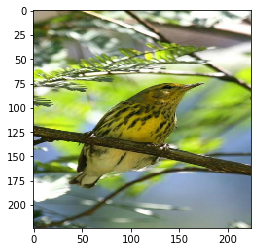

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0]/255)
print(y_train[0])

In [0]:
X_train = np.concatenate((x_train,x_valid),axis=0)
Y_train = np.concatenate((y_train,y_valid),axis=0)

print(X_train.shape)
print(Y_train.shape)


# print(x_test.shape)

In [0]:
sum = np.unique(y_train)
n_classes = len(sum)

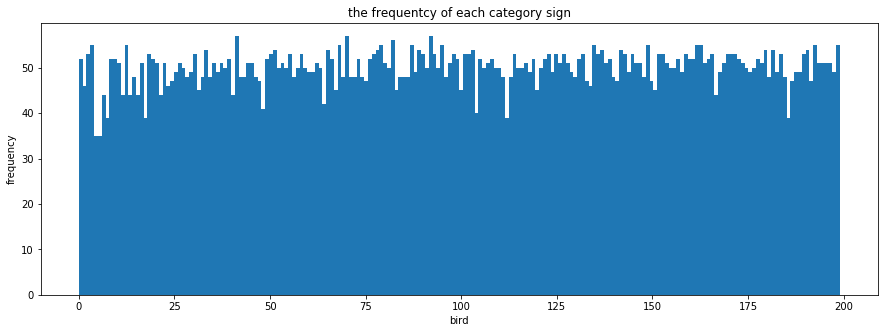

In [0]:
# 直方图来显示图像训练集的各个类别的分别情况
def plot_y_train_hist():
  fig = plt.figure(figsize=(15,5))
  ax = fig.add_subplot(1,1,1)
  hist = ax.hist(Y_train,bins=n_classes)
  ax.set_title("the frequentcy of each category sign")
  ax.set_xlabel("bird")
  ax.set_ylabel("frequency")
  plt.show()
  return hist

hist = plot_y_train_hist()

In [0]:
# 对标签数据进行one-hot编码

from keras.utils import np_utils
#Y_train = np_utils.to_categorical(Y_train,n_classes)
y_train = np_utils.to_categorical(y_train,n_classes)
y_valid = np_utils.to_categorical(y_valid,n_classes)
print("Shape after one-hot encoding:",y_train.shape)
print("Shape after one-hot encoding:",y_valid.shape)

Shape after one-hot encoding: (8251, 200)
Shape after one-hot encoding: (1768, 200)


In [0]:
# 划分数据集
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(X_train,Y_train,test_size=0.3,random_state=2019)



print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

print(x_test.shape)

(7013, 224, 224, 3)
(7013, 200)
(3006, 224, 224, 3)
(3006, 200)
(1768, 224, 224, 3)


**4.定义模型**

In [0]:
# 导入开发需要的库
from keras import optimizers, Input
from keras.applications import  imagenet_utils

from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.applications import *

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [0]:
# 绘制训练过程中的 loss 和 acc 变化曲线
import matplotlib.pyplot as plt
%matplotlib inline

def history_plot(history_fit):
    plt.figure(figsize=(12,6))
    
    # summarize history for accuracy
    plt.subplot(121)
    plt.plot(history_fit.history["acc"])
    plt.plot(history_fit.history["val_acc"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="upper left")
    
    # summarize history for loss
    plt.subplot(122)
    plt.plot(history_fit.history["loss"])
    plt.plot(history_fit.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    
    plt.show()

In [0]:
# fine-tune 模型
def fine_tune_model(model, optimizer, batch_size, epochs, freeze_num):
    '''
    discription: 对指定预训练模型进行fine-tune，并保存为.hdf5格式
    
    MODEL：传入的模型，VGG16， ResNet50, ...

    optimizer: fine-tune all layers 的优化器, first part默认用adadelta
    batch_size: 每一批的尺寸，建议32/64/128
    epochs: fine-tune all layers的代数
    freeze_num: first part冻结卷积层的数量
    '''

    # datagen = ImageDataGenerator(
    #     rescale=1.255,
    #     # shear_range=0.2,
    #     # zoom_range=0.2,
    #     # horizontal_flip=True,
    #     # vertical_flip=True,
    #     # fill_mode="nearest"
    #   )
    
    # datagen.fit(X_train)
    
    
    # first: 仅训练全连接层（权重随机初始化的）
    # 冻结所有卷积层
    
    for layer in model.layers[:freeze_num]:
        layer.trainable = False
    
    model.compile(optimizer=optimizer, 
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    # model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
    #                     steps_per_epoch=len(x_train)/32,
    #                     epochs=3,
    #                     shuffle=True,
    #                     verbose=1,
    #                     datagen.flow(x_valid, y_valid))
    model.fit(x_train,
         y_train,
         batch_size=batch_size,
         epochs=3,
         shuffle=True,
         verbose=1,
         validation_data=(x_valid,y_valid)
        )
    print('Finish step_1')
    
    
    # second: fine-tune all layers
    for layer in model.layers[:]:
        layer.trainable = True
    
    rc = ReduceLROnPlateau(monitor="val_acc",
                factor=0.2,
                patience=4,
                verbose=1,
                mode='max')

    model_name = model.name  + ".hdf5"
    mc = ModelCheckpoint(model_name, 
               monitor="val_acc", 
               save_best_only=True,
               verbose=1,
               mode='max')
    el = EarlyStopping(monitor="val_acc",
              min_delta=0,
              patience=5,
              verbose=1,
              restore_best_weights=True)
    
    model.compile(optimizer=optimizer, 
           loss='categorical_crossentropy', 
           metrics=["accuracy"])

    # history_fit = model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
    #                                  steps_per_epoch=len(x_train)/32,
    #                                  epochs=epochs,
    #                                  shuffle=True,
    #                                  verbose=1,
    #                                  callbacks=[mc,rc,el],
    #                                  datagen.flow(x_valid, y_valid))
    history_fit = model.fit(x_train,
                 y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 shuffle=True,
                 verbose=1,
                 validation_data=(x_valid,y_valid),
                 callbacks=[mc,rc,el])
    
    print('Finish fine-tune')
    return history_fit

**5.VGG16模型**

In [0]:
# 定义一个VGG16的模型
def vgg16_model(img_rows,img_cols):
  x = Input(shape=(img_rows, img_cols, 3))
  x = Lambda(imagenet_utils.preprocess_input)(x)
  base_model = VGG16(input_tensor=x,weights="imagenet",include_top=False, pooling='avg')
  x = base_model.output
  x = Dense(1024,activation="relu",name="fc1")(x)
  x = Dropout(0.5)(x)
  predictions = Dense(n_classes,activation="softmax",name="predictions")(x)

  vgg16_model = Model(inputs=base_model.input,outputs=predictions,name="vgg16")
  
  return vgg16_model

In [0]:
# 创建VGG16模型
img_rows, img_cols = 300, 300
vgg16_model = vgg16_model(img_rows,img_cols)












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
for i,layer in enumerate(vgg16_model.layers):
  print(i,layer.name)

0 input_3
1 lambda_3
2 block1_conv1
3 block1_conv2
4 block1_pool
5 block2_conv1
6 block2_conv2
7 block2_pool
8 block3_conv1
9 block3_conv2
10 block3_conv3
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_pool
16 block5_conv1
17 block5_conv2
18 block5_conv3
19 block5_pool
20 global_average_pooling2d_3
21 fc1
22 dropout_3
23 predictions


In [0]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________

In [0]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 30
freeze_num = 21


%time vgg16_history = fine_tune_model(vgg16_model,optimizer,batch_size,epochs,freeze_num)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7013 samples, validate on 3006 samples
Epoch 1/3
7013/7013 [==============================] - 53s 8ms/step - loss: 7.1095 - acc: 0.0211 - val_loss: 4.4823 - val_acc: 0.0915
Epoch 2/3
7013/7013 [==============================] - 46s 7ms/step - loss: 4.4798 - acc: 0.0914 - val_loss: 3.6892 - val_acc: 0.2239
Epoch 3/3
7013/7013 [==============================] - 46s 7ms/step - loss: 3.6436 - acc: 0.1925 - val_loss: 3.0040 - val_acc: 0.3440
Finish step_1
Train on 7013 samples, validate on 3006 samples
Epoch 1/30
7013/7013 [==============================] - 47s 7ms/step - loss: 2.9171 - acc: 0.3087 - val_loss: 2.1821 - val_acc: 0.4667

Epoch 00001: val_loss improved from inf to 2.18212, saving model to vgg16.hdf5
Epoch 2/30
7013/7013 [==============================] - 46s 7ms/step - loss: 1.9944 - acc: 0.4840 - val_loss: 1.8748 - val_acc: 0.5226

Epoch 00002: val_loss improved from 2.1

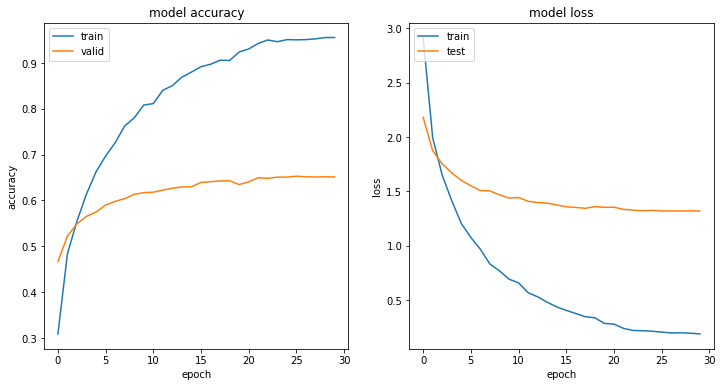

In [0]:
history_plot(vgg16_history)

**6.EfficientNetB4**

In [0]:
!pip install -U efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.6/dist-packages (1.0.0)


In [0]:
# 导入Efficient模块
from efficientnet.keras import EfficientNetB4
import keras.backend as K

In [0]:
# 定义一个EfficientNet模型
def efficient_model(img_rows,img_cols):
  K.clear_session()
  x = Input(shape=(img_rows,img_cols,3))
  x = Lambda(imagenet_utils.preprocess_input)(x)
  
  base_model = EfficientNetB4(input_tensor=x,weights="imagenet",include_top=False,pooling="avg")
  x = base_model.output
  x = Dense(1024,activation="relu",name="fc1")(x)
  x = Dropout(0.5)(x)
  predictions = Dense(n_classes,activation="softmax",name="predictions")(x)

  eB_model = Model(inputs=base_model.input,outputs=predictions,name="eB4")

  return eB_model

In [0]:
# 创建Efficient模型
img_rows,img_cols=224,224
eB_model = efficient_model(img_rows,img_cols)

In [0]:
for i,layer in enumerate(eB_model.layers):
  print(i,layer.name)

0 input_1
1 lambda_1
2 stem_conv
3 stem_bn
4 stem_activation
5 block1a_dwconv
6 block1a_bn
7 block1a_activation
8 block1a_se_squeeze
9 block1a_se_reshape
10 block1a_se_reduce
11 block1a_se_expand
12 block1a_se_excite
13 block1a_project_conv
14 block1a_project_bn
15 block1b_dwconv
16 block1b_bn
17 block1b_activation
18 block1b_se_squeeze
19 block1b_se_reshape
20 block1b_se_reduce
21 block1b_se_expand
22 block1b_se_excite
23 block1b_project_conv
24 block1b_project_bn
25 block1b_drop
26 block1b_add
27 block2a_expand_conv
28 block2a_expand_bn
29 block2a_expand_activation
30 block2a_dwconv
31 block2a_bn
32 block2a_activation
33 block2a_se_squeeze
34 block2a_se_reshape
35 block2a_se_reduce
36 block2a_se_expand
37 block2a_se_excite
38 block2a_project_conv
39 block2a_project_bn
40 block2b_expand_conv
41 block2b_expand_bn
42 block2b_expand_activation
43 block2b_dwconv
44 block2b_bn
45 block2b_activation
46 block2b_se_squeeze
47 block2b_se_reshape
48 block2b_se_reduce
49 block2b_se_expand
50 blo

In [0]:
eB_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 40) 1080        lambda_1[0][0]                   
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 40) 160         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activ

In [0]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 30
freeze_num = 469
eB_model_history  = fine_tune_model(eB_model,optimizer,batch_size,epochs,freeze_num)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8251 samples, validate on 1768 samples
Epoch 1/3
8251/8251 [==============================] - 49s 6ms/step - loss: 9.3405 - acc: 0.0053 - val_loss: 5.5664 - val_acc: 0.0051
Epoch 2/3
8251/8251 [==============================] - 38s 5ms/step - loss: 6.8968 - acc: 0.0052 - val_loss: 5.3289 - val_acc: 0.0040
Epoch 3/3
8251/8251 [==============================] - 39s 5ms/step - loss: 5.8723 - acc: 0.0061 - val_loss: 5.3021 - val_acc: 0.0040
Finish step_1
Train on 8251 samples, validate on 1768 samples
Epoch 1/30
8251/8251 [==============================] - 261s 32ms/step - loss: 4.4794 - acc: 0.0980 - val_loss: 2.7448 - val_acc: 0.3399

Epoch 00001: val_loss improved from inf to 2.74482, saving model to eB4.hdf5
Epoch 2/30
8251/8251 [==============================] - 155s 19ms/step - loss: 2.2635 - acc: 0.4157 - val_loss: 1.4371 - val_acc: 0.5973

Epoch 00002: val_loss improved from 2.7

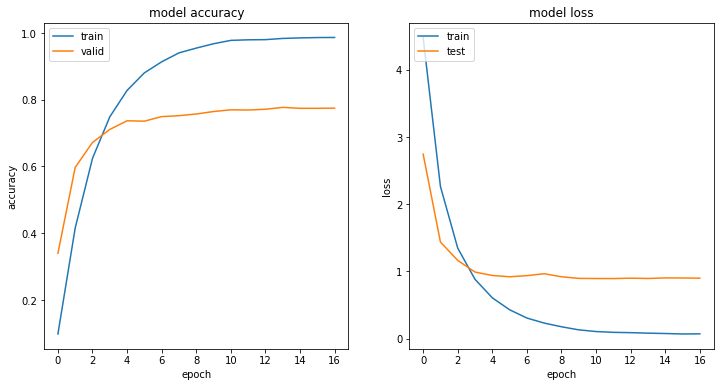

In [0]:
history_plot(eB_model_history)

**7.efficientnet-with-attention**

In [0]:
!pip install -U efficientnet

In [0]:
# 导入模块
from efficientnet.keras import EfficientNetB3
import keras.backend as K

In [0]:
# 定义一个加入Attention模块的Efficient网络架构即efficientnet-with-attention

def efficient_attention_model(img_rows,img_cols):
  K.clear_session()
  
  in_lay = Input(shape=(img_rows,img_cols,3))
  base_model = EfficientNetB3(input_shape=(img_rows,img_cols,3),weights="imagenet",include_top=False)

  pt_depth = base_model.get_output_shape_at(0)[-1]

  pt_features = base_model(in_lay)
  bn_features = BatchNormalization()(pt_features)

  # here we do an attention mechanism to turn pixels in the GAP on an off
  atten_layer = Conv2D(64,kernel_size=(1,1),padding="same",activation="relu")(Dropout(0.5)(bn_features))
  atten_layer = Conv2D(16,kernel_size=(1,1),padding="same",activation="relu")(atten_layer)
  atten_layer = Conv2D(8,kernel_size=(1,1),padding="same",activation="relu")(atten_layer)
  atten_layer = Conv2D(1,kernel_size=(1,1),padding="valid",activation="sigmoid")(atten_layer)# H,W,1
  # fan it out to all of the channels
  up_c2_w = np.ones((1,1,1,pt_depth)) #1,1,C
  up_c2 = Conv2D(pt_depth,kernel_size=(1,1),padding="same",activation="linear",use_bias=False,weights=[up_c2_w])
  up_c2.trainable = False
  atten_layer = up_c2(atten_layer)# H,W,C

  mask_features = multiply([atten_layer,bn_features])# H,W,C

  gap_features = GlobalAveragePooling2D()(mask_features)# 1,1,C
  # gap_mask = GlobalAveragePooling2D()(atten_layer)# 1,1,C

  # # to account for missing values from the attention model
  # gap = Lambda(lambda x:x[0]/x[1],name="RescaleGAP")([gap_features,gap_mask])
  gap_dr = Dropout(0.25)(gap_features)
  dr_steps = Dropout(0.25)(Dense(1000,activation="relu")(gap_dr))
  out_layer = Dense(200,activation="softmax")(dr_steps)
  eb_atten_model = Model(inputs=[in_lay],outputs=[out_layer])

  return eb_atten_model

In [0]:
img_rows,img_cols = 224,224
eB_atten_model = efficient_attention_model(img_rows,img_cols)

In [0]:
eB_atten_model.save("eb_atten_model.h5")

In [0]:
for i,layer in enumerate(eB_atten_model.layers):
  print(i,layer.name)

0 input_1
1 efficientnet-b3
2 batch_normalization_1
3 dropout_1
4 conv2d_1
5 conv2d_2
6 conv2d_3
7 conv2d_4
8 conv2d_5
9 multiply_1
10 global_average_pooling2d_1
11 dropout_2
12 dense_1
13 dropout_3
14 dense_2


In [0]:
eB_atten_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
efficientnet-b4 (Model)         (None, 7, 7, 1792)   17673816    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 7, 7, 1792)   7168        efficientnet-b4[1][0]            
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 7, 7, 1792)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_1 (

In [0]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 30
freeze_num = 12
eB_atten_model_history  = fine_tune_model(eB_atten_model,optimizer,batch_size,epochs,freeze_num)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8251 samples, validate on 1768 samples
Epoch 1/3
8251/8251 [==============================] - 39s 5ms/step - loss: 5.2083 - acc: 0.0221 - val_loss: 16.0324 - val_acc: 0.0040
Epoch 2/3
8251/8251 [==============================] - 28s 3ms/step - loss: 4.7719 - acc: 0.1130 - val_loss: 16.0147 - val_acc: 0.0057
Epoch 3/3
8251/8251 [==============================] - 28s 3ms/step - loss: 4.3135 - acc: 0.2112 - val_loss: 16.0056 - val_acc: 0.0062
Finish step_1
Train on 8251 samples, validate on 1768 samples
Epoch 1/30
8251/8251 [==============================] - 168s 20ms/step - loss: 2.1612 - acc: 0.4549 - val_loss: 1.1888 - val_acc: 0.6725

Epoch 00001: val_loss improved from inf to 1.18880, saving model to model_1.hdf5
Epoch 2/30
8251/8251 [==============================] - 121s 15ms/step - loss: 0.9003 - acc: 0.7442 - val_loss: 0.9400 - val_acc: 0.7330

Epoch 00002: val_loss improved

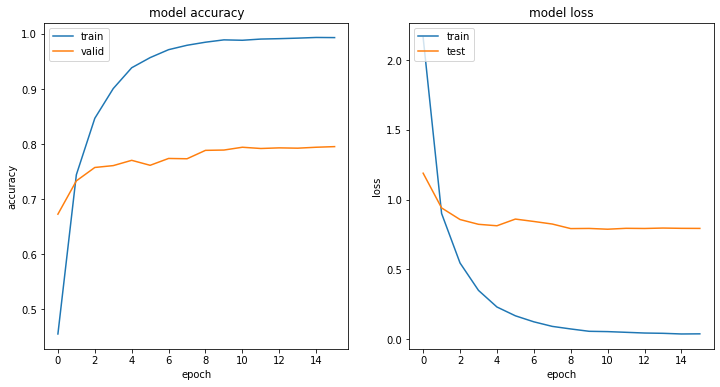

In [0]:
history_plot(eB_atten_model_history)

**8.EfficientNetB3 with attention v2**

In [0]:
!pip install -U efficientnet

In [0]:
# 导入模块
from efficientnet.keras import EfficientNetB3
import keras.backend as K
import tensorflow as tf

In [0]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid

def attach_attention_module(net, attention_module):
  if attention_module == 'se_block': # SE_block
    net = se_block(net)
  elif attention_module == 'cbam_block': # CBAM_block
    net = cbam_block(net)
  else:
    raise Exception("'{}' is not supported attention module!".format(attention_module))

  return net

def se_block(input_feature, ratio=8):
	"""Contains the implementation of Squeeze-and-Excitation(SE) block.
	As described in https://arxiv.org/abs/1709.01507.
	"""
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature._keras_shape[channel_axis]

	se_feature = GlobalAveragePooling2D()(input_feature)
	se_feature = Reshape((1, 1, channel))(se_feature)
	assert se_feature._keras_shape[1:] == (1,1,channel)
	se_feature = Dense(channel // ratio,
					   activation='relu',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature._keras_shape[1:] == (1,1,channel//ratio)
	se_feature = Dense(channel,
					   activation='sigmoid',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature._keras_shape[1:] == (1,1,channel)
	if K.image_data_format() == 'channels_first':
		se_feature = Permute((3, 1, 2))(se_feature)

	se_feature = multiply([input_feature, se_feature])
	return se_feature

def cbam_block(cbam_feature, ratio=8):
	"""Contains the implementation of Convolutional Block Attention Module(CBAM) block.
	As described in https://arxiv.org/abs/1807.06521.
	"""
	
	cbam_feature = channel_attention(cbam_feature, ratio)
	cbam_feature = spatial_attention(cbam_feature)
	return cbam_feature

def channel_attention(input_feature, ratio=8):
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature._keras_shape[channel_axis]
	
	shared_layer_one = Dense(channel//ratio,
							 activation='relu',
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	shared_layer_two = Dense(channel,
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	
	avg_pool = GlobalAveragePooling2D()(input_feature)    
	avg_pool = Reshape((1,1,channel))(avg_pool)
	assert avg_pool._keras_shape[1:] == (1,1,channel)
	avg_pool = shared_layer_one(avg_pool)
	assert avg_pool._keras_shape[1:] == (1,1,channel//ratio)
	avg_pool = shared_layer_two(avg_pool)
	assert avg_pool._keras_shape[1:] == (1,1,channel)
	
	max_pool = GlobalMaxPooling2D()(input_feature)
	max_pool = Reshape((1,1,channel))(max_pool)
	assert max_pool._keras_shape[1:] == (1,1,channel)
	max_pool = shared_layer_one(max_pool)
	assert max_pool._keras_shape[1:] == (1,1,channel//ratio)
	max_pool = shared_layer_two(max_pool)
	assert max_pool._keras_shape[1:] == (1,1,channel)
	
	cbam_feature = Add()([avg_pool,max_pool])
	cbam_feature = Activation('sigmoid')(cbam_feature)
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
	
	return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
	kernel_size = 7
	
	if K.image_data_format() == "channels_first":
		channel = input_feature._keras_shape[1]
		cbam_feature = Permute((2,3,1))(input_feature)
	else:
		channel = input_feature._keras_shape[-1]
		cbam_feature = input_feature
	
	avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
	assert avg_pool._keras_shape[-1] == 1
	max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
	assert max_pool._keras_shape[-1] == 1
	concat = Concatenate(axis=3)([avg_pool, max_pool])
	assert concat._keras_shape[-1] == 2
	cbam_feature = Conv2D(filters = 1,
					kernel_size=kernel_size,
					strides=1,
					padding='same',
					activation='sigmoid',
					kernel_initializer='he_normal',
					use_bias=False)(concat)	
	assert cbam_feature._keras_shape[-1] == 1
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
		
	return multiply([input_feature, cbam_feature])

In [0]:
# 定义一个EfficientNet模型
def efficient__atten2_model(img_rows,img_cols):
  K.clear_session()
  
  in_lay = Input(shape=(img_rows,img_cols,3))
  base_model = EfficientNetB3(input_shape=(img_rows,img_cols,3),weights="imagenet",include_top=False)
  pt_features = base_model(in_lay)
  bn_features = BatchNormalization()(pt_features)

  atten_features = attach_attention_module(bn_features,"se_block")
  gap_features = GlobalAveragePooling2D()(atten_features)

  gap_dr = Dropout(0.25)(gap_features)
  dr_steps = Dropout(0.25)(Dense(1000,activation="relu")(gap_dr))
  out_layer = Dense(n_classes,activation="softmax")(dr_steps)
  eb_atten_model = Model(inputs=[in_lay],outputs=[out_layer])

  return eb_atten_model

In [0]:
img_rows,img_cols = 224,224
eB_atten2_model = efficient__atten2_model(img_rows,img_cols)

In [0]:
for i,layer in enumerate(eB_atten2_model.layers):
  print(i,layer.name)

0 input_1
1 efficientnet-b3
2 batch_normalization_1
3 global_average_pooling2d_1
4 global_max_pooling2d_1
5 reshape_1
6 reshape_2
7 dense_1
8 dense_2
9 add_1
10 activation_1
11 multiply_1
12 lambda_1
13 lambda_2
14 concatenate_1
15 conv2d_1
16 multiply_2
17 global_average_pooling2d_2
18 dropout_1
19 dense_3
20 dropout_2
21 dense_4


In [0]:
eB_atten2_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
efficientnet-b3 (Model)         (None, 7, 7, 1536)   10783528    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 7, 7, 1536)   6144        efficientnet-b3[1][0]            
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 1536)         0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 30
freeze_num = 19
eB_atten2_model_history  = fine_tune_model(eB_atten2_model,optimizer,batch_size,epochs,freeze_num)

Train on 8251 samples, validate on 1768 samples
Epoch 1/3
8251/8251 [==============================] - 33s 4ms/step - loss: 5.3202 - acc: 0.0061 - val_loss: 16.0269 - val_acc: 0.0057
Epoch 2/3
8251/8251 [==============================] - 26s 3ms/step - loss: 5.3261 - acc: 0.0051 - val_loss: 16.0269 - val_acc: 0.0057
Epoch 3/3
8251/8251 [==============================] - 26s 3ms/step - loss: 5.3248 - acc: 0.0048 - val_loss: 16.0269 - val_acc: 0.0057
Finish step_1
Train on 8251 samples, validate on 1768 samples
Epoch 1/30
8251/8251 [==============================] - 153s 19ms/step - loss: 3.9559 - acc: 0.1742 - val_loss: 2.1066 - val_acc: 0.4712

Epoch 00001: val_loss improved from inf to 2.10657, saving model to model_1.hdf5
Epoch 2/30
8251/8251 [==============================] - 119s 14ms/step - loss: 1.6183 - acc: 0.5708 - val_loss: 1.1768 - val_acc: 0.6618

Epoch 00002: val_loss improved from 2.10657 to 1.17679, saving model to model_1.hdf5
Epoch 3/30
8251/8251 [=====================

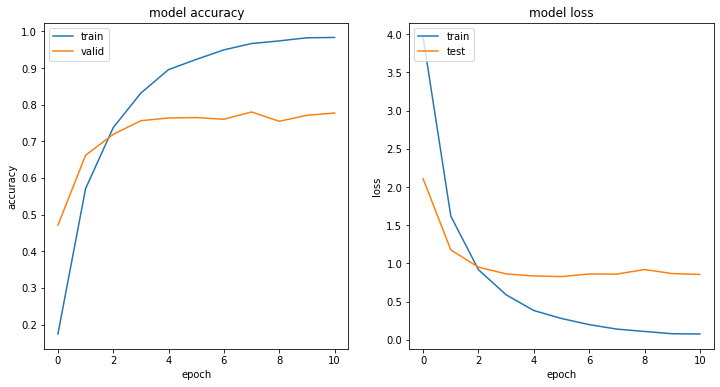

In [0]:
history_plot(eB_atten2_model_history)

**9.双线性EfficientNet**

In [0]:
!pip install -U efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.6/dist-packages (1.0.0)


In [0]:
# 导入开发需要的库
from keras import optimizers, Input
from keras.applications import  imagenet_utils

from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.applications import *

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [0]:
# 导入模块
from efficientnet.keras import EfficientNetB3
import keras.backend as K
import tensorflow as tf

In [0]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid

def attach_attention_module(net, attention_module):
  if attention_module == 'se_block': # SE_block
    net = se_block(net)
  elif attention_module == 'cbam_block': # CBAM_block
    net = cbam_block(net)
  else:
    raise Exception("'{}' is not supported attention module!".format(attention_module))

  return net

def se_block(input_feature, ratio=8):
	"""Contains the implementation of Squeeze-and-Excitation(SE) block.
	As described in https://arxiv.org/abs/1709.01507.
	"""
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature._keras_shape[channel_axis]

	se_feature = GlobalAveragePooling2D()(input_feature)
	se_feature = Reshape((1, 1, channel))(se_feature)
	assert se_feature._keras_shape[1:] == (1,1,channel)
	se_feature = Dense(channel // ratio,
					   activation='relu',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature._keras_shape[1:] == (1,1,channel//ratio)
	se_feature = Dense(channel,
					   activation='sigmoid',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature._keras_shape[1:] == (1,1,channel)
	if K.image_data_format() == 'channels_first':
		se_feature = Permute((3, 1, 2))(se_feature)

	se_feature = multiply([input_feature, se_feature])
	return se_feature

def cbam_block(cbam_feature, ratio=8):
	"""Contains the implementation of Convolutional Block Attention Module(CBAM) block.
	As described in https://arxiv.org/abs/1807.06521.
	"""
	
	cbam_feature = channel_attention(cbam_feature, ratio)
	cbam_feature = spatial_attention(cbam_feature)
	return cbam_feature

def channel_attention(input_feature, ratio=8):
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature._keras_shape[channel_axis]
	
	shared_layer_one = Dense(channel//ratio,
							 activation='relu',
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	shared_layer_two = Dense(channel,
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	
	avg_pool = GlobalAveragePooling2D()(input_feature)    
	avg_pool = Reshape((1,1,channel))(avg_pool)
	assert avg_pool._keras_shape[1:] == (1,1,channel)
	avg_pool = shared_layer_one(avg_pool)
	assert avg_pool._keras_shape[1:] == (1,1,channel//ratio)
	avg_pool = shared_layer_two(avg_pool)
	assert avg_pool._keras_shape[1:] == (1,1,channel)
	
	max_pool = GlobalMaxPooling2D()(input_feature)
	max_pool = Reshape((1,1,channel))(max_pool)
	assert max_pool._keras_shape[1:] == (1,1,channel)
	max_pool = shared_layer_one(max_pool)
	assert max_pool._keras_shape[1:] == (1,1,channel//ratio)
	max_pool = shared_layer_two(max_pool)
	assert max_pool._keras_shape[1:] == (1,1,channel)
	
	cbam_feature = Add()([avg_pool,max_pool])
	cbam_feature = Activation('sigmoid')(cbam_feature)
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
	
	return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
	kernel_size = 7
	
	if K.image_data_format() == "channels_first":
		channel = input_feature._keras_shape[1]
		cbam_feature = Permute((2,3,1))(input_feature)
	else:
		channel = input_feature._keras_shape[-1]
		cbam_feature = input_feature
	
	avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
	assert avg_pool._keras_shape[-1] == 1
	max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
	assert max_pool._keras_shape[-1] == 1
	concat = Concatenate(axis=3)([avg_pool, max_pool])
	assert concat._keras_shape[-1] == 2
	cbam_feature = Conv2D(filters = 1,
					kernel_size=kernel_size,
					strides=1,
					padding='same',
					activation='sigmoid',
					kernel_initializer='he_normal',
					use_bias=False)(concat)	
	assert cbam_feature._keras_shape[-1] == 1
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
		
	return multiply([input_feature, cbam_feature])

In [0]:
# 定义一个双线性EfficientNet Attention模型
def blinear_efficient__atten_model(img_rows,img_cols):
  K.clear_session()
  
  in_lay = Input(shape=(img_rows,img_cols,3))
  base_model = EfficientNetB3(input_shape=(img_rows,img_cols,3),weights="imagenet",include_top=False)
  
  pt_depth = base_model.get_output_shape_at(0)[-1]

  cnn_features_a = base_model(in_lay)
  cnn_bn_features_a = BatchNormalization()(cnn_features_a)
  
  # attention mechanism
  # here we do an attention mechanism to turn pixels in the GAP on an off
  atten_layer = Conv2D(64,kernel_size=(1,1),padding="same",activation="relu")(Dropout(0.5)(cnn_bn_features_a))
  atten_layer = Conv2D(16,kernel_size=(1,1),padding="same",activation="relu")(atten_layer)
  atten_layer = Conv2D(8,kernel_size=(1,1),padding="same",activation="relu")(atten_layer)
  atten_layer = Conv2D(1,kernel_size=(1,1),padding="valid",activation="sigmoid")(atten_layer)# H,W,1
  # fan it out to all of the channels
  up_c2_w = np.ones((1,1,1,pt_depth)) #1,1,C
  up_c2 = Conv2D(pt_depth,kernel_size=(1,1),padding="same",activation="linear",use_bias=False,weights=[up_c2_w])
  up_c2.trainable = True
  atten_layer = up_c2(atten_layer)# H,W,C

  cnn_atten_out_a = multiply([atten_layer,cnn_bn_features_a])# H,W,C

  cnn_atten_out_b = cnn_atten_out_a

  cnn_out_dot = multiply([cnn_atten_out_a,cnn_atten_out_b])
  gap_features = GlobalAveragePooling2D()(cnn_out_dot)
  gap_dr = Dropout(0.25)(gap_features)
  dr_steps = Dropout(0.25)(Dense(1000,activation="relu")(gap_dr))
  out_layer = Dense(200,activation="softmax")(dr_steps)
  
  b_eff_atten_model = Model(inputs=[in_lay],outputs=[out_layer],name="blinear_efficient_atten")

  return b_eff_atten_model

In [0]:
# 创建双线性EfficientNet Attention模型
img_rows,img_cols = 256,256
befficient_model = blinear_efficient__atten_model(img_rows,img_cols)

In [0]:
befficient_model.summary()

Model: "blinear_efficient_atten"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
efficientnet-b3 (Model)         (None, 8, 8, 1536)   10783528    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 8, 8, 1536)   6144        efficientnet-b3[1][0]            
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 8, 8, 1536)   0           batch_normalization_1[0][0]      
____________________________________________________________________________

In [0]:
befficient_model.save("befficient_model.h5")

In [0]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 30
freeze_num = 19
befficient_model_history  = fine_tune_model(befficient_model,optimizer,batch_size,epochs,freeze_num)

Train on 8251 samples, validate on 1768 samples
Epoch 1/3
8251/8251 [==============================] - 38s 5ms/step - loss: 5.3903 - acc: 0.0052 - val_loss: 14.1897 - val_acc: 0.0040
Epoch 2/3
8251/8251 [==============================] - 33s 4ms/step - loss: 5.3926 - acc: 0.0052 - val_loss: 14.1897 - val_acc: 0.0040
Epoch 3/3
8251/8251 [==============================] - 33s 4ms/step - loss: 5.3948 - acc: 0.0068 - val_loss: 14.1897 - val_acc: 0.0040
Finish step_1
Train on 8251 samples, validate on 1768 samples
Epoch 1/30
8251/8251 [==============================] - 193s 23ms/step - loss: 4.7127 - acc: 0.0749 - val_loss: 2.9079 - val_acc: 0.3060

Epoch 00001: val_acc improved from -inf to 0.30600, saving model to blinear_efficient_atten.hdf5
Epoch 2/30
8251/8251 [==============================] - 148s 18ms/step - loss: 2.1653 - acc: 0.4462 - val_loss: 1.3817 - val_acc: 0.6160

Epoch 00002: val_acc improved from 0.30600 to 0.61595, saving model to blinear_efficient_atten.hdf5
Epoch 3/30
8

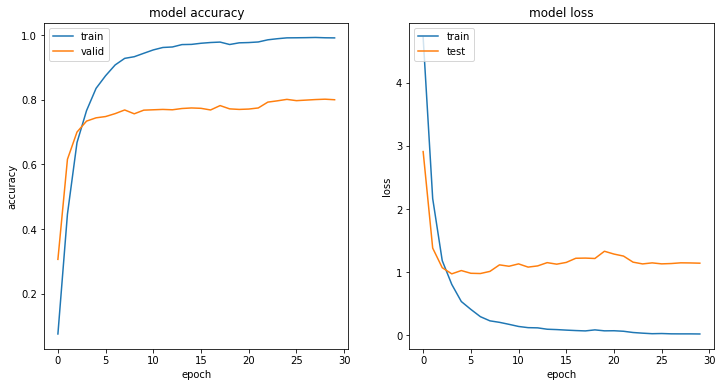

In [0]:
history_plot(befficient_model_history)

**10.双线性VGG16模型**

In [0]:
# 定义双线性VGG16模型

from keras import backend as K

def batch_dot(cnn_ab):
    return K.batch_dot(cnn_ab[0], cnn_ab[1], axes=[1, 1])

def sign_sqrt(x):
    return K.sign(x) * K.sqrt(K.abs(x) + 1e-10)

def l2_norm(x):
    return K.l2_normalize(x, axis=-1)
 
 
def bilinear_vgg16(img_rows,img_cols):
    input_tensor = Input(shape=(img_rows,img_cols,3))
    input_tensor = Lambda(imagenet_utils.preprocess_input)(input_tensor)

    model_vgg16 = VGG16(include_top=False, weights="imagenet",
                        input_tensor=input_tensor,pooling="avg")
    
    cnn_out_a = model_vgg16.layers[-2].output
    cnn_out_shape = model_vgg16.layers[-2].output_shape
    cnn_out_a = Reshape([cnn_out_shape[1]*cnn_out_shape[2],
                         cnn_out_shape[-1]])(cnn_out_a)

    cnn_out_b = cnn_out_a

    cnn_out_dot = Lambda(batch_dot)([cnn_out_a, cnn_out_b])
    cnn_out_dot = Reshape([cnn_out_shape[-1]*cnn_out_shape[-1]])(cnn_out_dot)
 
    sign_sqrt_out = Lambda(sign_sqrt)(cnn_out_dot)
    l2_norm_out = Lambda(l2_norm)(sign_sqrt_out)
    
    fc1 = Dense(1024,activation="relu",name="fc1")(l2_norm_out)
    dropout = Dropout(0.5)(fc1)
    output = Dense(n_classes, activation="softmax",name="output")(dropout)
    bvgg16_model = Model(inputs=model_vgg16.input, outputs=output,name="bvgg16")

    return bvgg16_model


In [0]:
# 创建双线性VGG16模型
img_rows,img_cols = 300,300
bvgg16_model = bilinear_vgg16(img_rows,img_cols)












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
for i,layer in enumerate(bvgg16_model.layers):
  print(i,layer.name)

0 input_1
1 lambda_1
2 block1_conv1
3 block1_conv2
4 block1_pool
5 block2_conv1
6 block2_conv2
7 block2_pool
8 block3_conv1
9 block3_conv2
10 block3_conv3
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_pool
16 block5_conv1
17 block5_conv2
18 block5_conv3
19 block5_pool
20 reshape_1
21 lambda_2
22 reshape_2
23 lambda_3
24 lambda_4
25 fc1
26 dropout_1
27 output


In [0]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 100
freeze_num = 25
bvgg16_history = fine_tune_model(bvgg16_model,optimizer,batch_size,epochs,freeze_num)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8251 samples, validate on 1768 samples
Epoch 1/3
8251/8251 [==============================] - 80s 10ms/step - loss: 5.1197 - acc: 0.0572 - val_loss: 4.8534 - val_acc: 0.2002
Epoch 2/3
8251/8251 [==============================] - 71s 9ms/step - loss: 4.4758 - acc: 0.1863 - val_loss: 4.1177 - val_acc: 0.3569
Epoch 3/3
8251/8251 [==============================] - 71s 9ms/step - loss: 3.7386 - acc: 0.2743 - val_loss: 3.4439 - val_acc: 0.4378
Finish step_1
Train on 8251 samples, validate on 1768 samples
Epoch 1/100
8251/8251 [==============================] - 76s 9ms/step - loss: 2.9186 - acc: 0.3475 - val_loss: 2.5064 - val_acc: 0.5334

Epoch 00001: val_loss improved from inf to 2.50638, saving model to bvgg16.hdf5
Epoch 2/100
8251/8251 [==============================] - 70s 9ms/step - loss: 2.3073 - acc: 0.4696 - val_loss: 2.1717 - val_acc: 0.5888

Epoch 00002: val_loss improved from

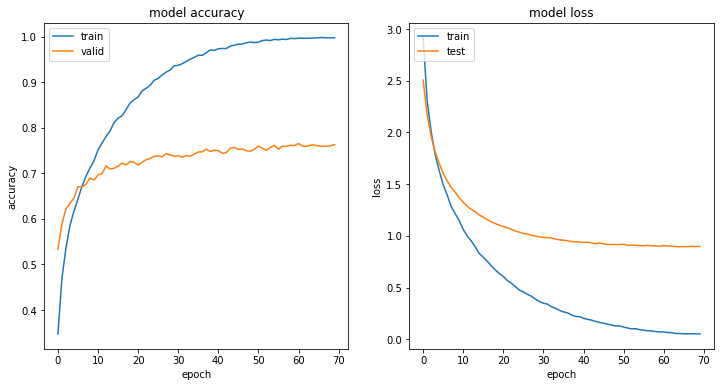

In [0]:
history_plot(bvgg16_history)

### 加载

In [0]:
xception_model.load_weights("xception.hdf5")

### 预测

In [0]:
predict = xception_model.predict(x_test)
predict=np.argmax(predict,axis=1)
predict = predict + 1

In [0]:
predict.shape

(1768,)

In [0]:
print(predict[:5])

[71 71 71  9 71]


In [ ]:
print(x_test_img_path)

In [0]:
import pandas as pd

df = pd.DataFrame({"img_path":x_test_img_path, "tags":predict})
df.to_csv("submit.csv",index=None)